Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0

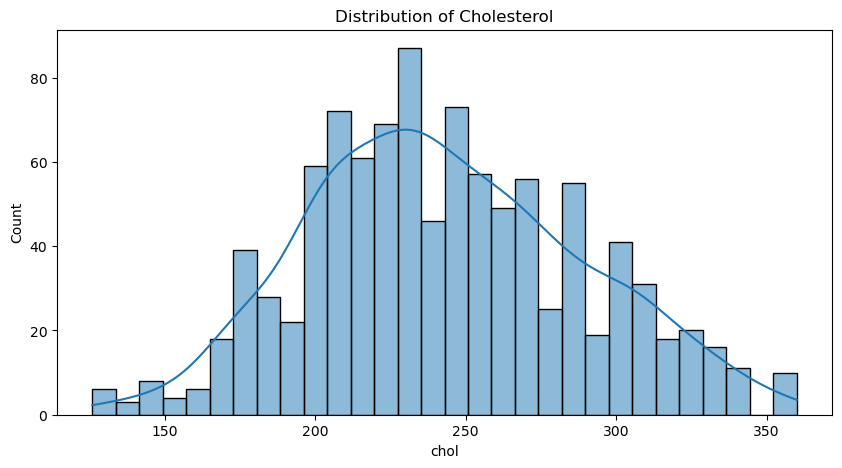

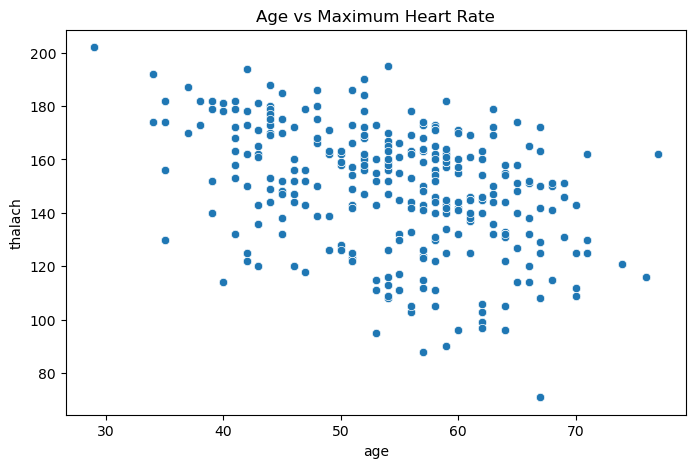

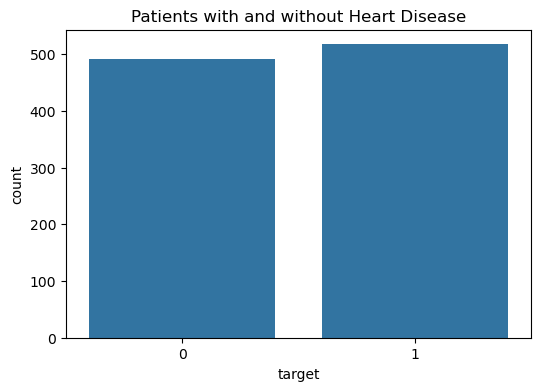

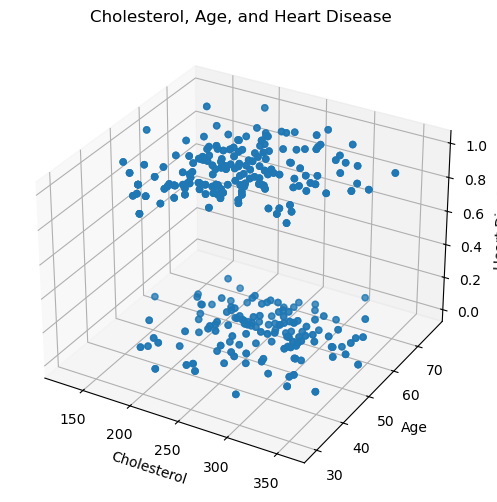

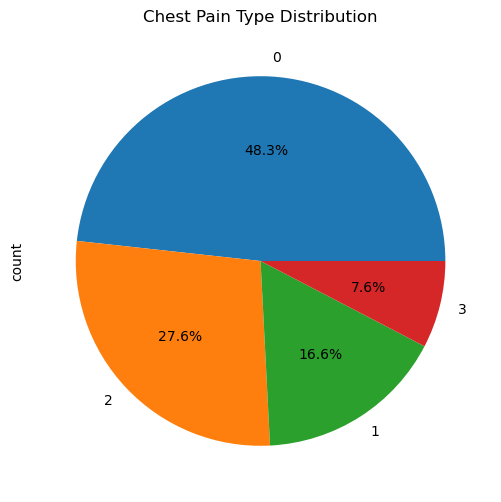

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\user\Desktop\Intelligent Programming\Tasks\Task 3\heart.csv')

# Display basic information
print("Columns:", df.columns.tolist())
print(df.head())
print(df.tail())
print(df.describe())

# Check and handle missing values
print("Missing Values Before Imputation:\n", df.isnull().sum())
df.fillna(df.mean(), inplace=True)
print("Missing Values After Imputation:\n", df.isnull().sum())

# Check and remove outliers in cholesterol (chol) using IQR
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR))
df = df[~outliers]

# Data shape before and after preprocessing
print("Shape before processing:", df.shape)

# Compute statistics
print("Mean Cholesterol:", df['chol'].mean())
print("Median Cholesterol:", df['chol'].median())
print("Standard Deviation Cholesterol:", df['chol'].std())
print("Mean Blood Pressure (With Heart Disease):", df[df['target'] == 1]['trestbps'].mean())
print("Mean Blood Pressure (Without Heart Disease):", df[df['target'] == 0]['trestbps'].mean())
print("Max Heart Rate:", df['thalach'].max())
print("Min Heart Rate:", df['thalach'].min())

# Sorting & Searching
sorted_df = df.sort_values(by='chol', ascending=False)
high_chol_patients = df[df['chol'] > 300]
old_abnormal_ecg = df[(df['age'] > 60) & (df['restecg'] > 0)]

# Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['chol'], bins=30, kde=True)
plt.title('Distribution of Cholesterol')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['thalach'])
plt.title('Age vs Maximum Heart Rate')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'])
plt.title('Patients with and without Heart Disease')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['chol'], df['age'], df['target'])
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Age')
ax.set_zlabel('Heart Disease')
plt.title('Cholesterol, Age, and Heart Disease')
plt.show()

plt.figure(figsize=(6, 6))
df['cp'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Chest Pain Type Distribution')
plt.show()
